<a href="https://colab.research.google.com/github/shetehm/Cardiovascular-Risk-Prediction/blob/main/Individual_Colab_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Contributor: Harshavardhan M. Shete**

In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy.stats import skew

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Fetching the dataset
cardio_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cardiovacular_Risk_Prediction_Harshavardhan_Shete/data_cardiovascular_risk.csv', encoding='unicode_escape')

In [ ]:
cardio_df.shape

(3390, 17)

In [ ]:
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
cardio_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
cardio_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## **Data Description**

**Demographic:**

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 

**Behavioral**

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a strok(Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

**Predict variable (desired target)**

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV

In [ ]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
#Getting five point data summary
cardio_df.describe([0.01,0.1,.25, .5, .75,.99])

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
1%,33.890000,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,153.000000,96.94500,60.000000,18.252500,52.880000,55.000000,0.000000
10%,338.900000,39.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,183.000000,109.00000,69.000000,21.030000,61.000000,65.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
99%,3355.110000,67.000000,4.000000,43.000000,1.000000,0.000000,1.000000,1.000000,355.490000,202.05500,119.110000,38.855000,110.000000,183.450000,1.000000


The five point summary is useful to understand the distribution of each variable and check for possibility of outliers. For example, cigsPerDay (cigarettes per day) has value zero until 50 percentile and it increases rapidly for 75 and 99 percentile and there is huge differnce between 99 percentile and maximum. This signifies possible outliers. Same is the case with totChol, sysBP and glucos variables.

In [ ]:
pip install missingno

In [ ]:
#Importing missingno
import missingno as msno

Missingno is an excellent and simple to use Python library that provides a series of visualisations to understand the presence and distribution of missing data within a pandas dataframe. This can be in the form of either a barplot, matrix plot, heatmap, or a dendrogram.

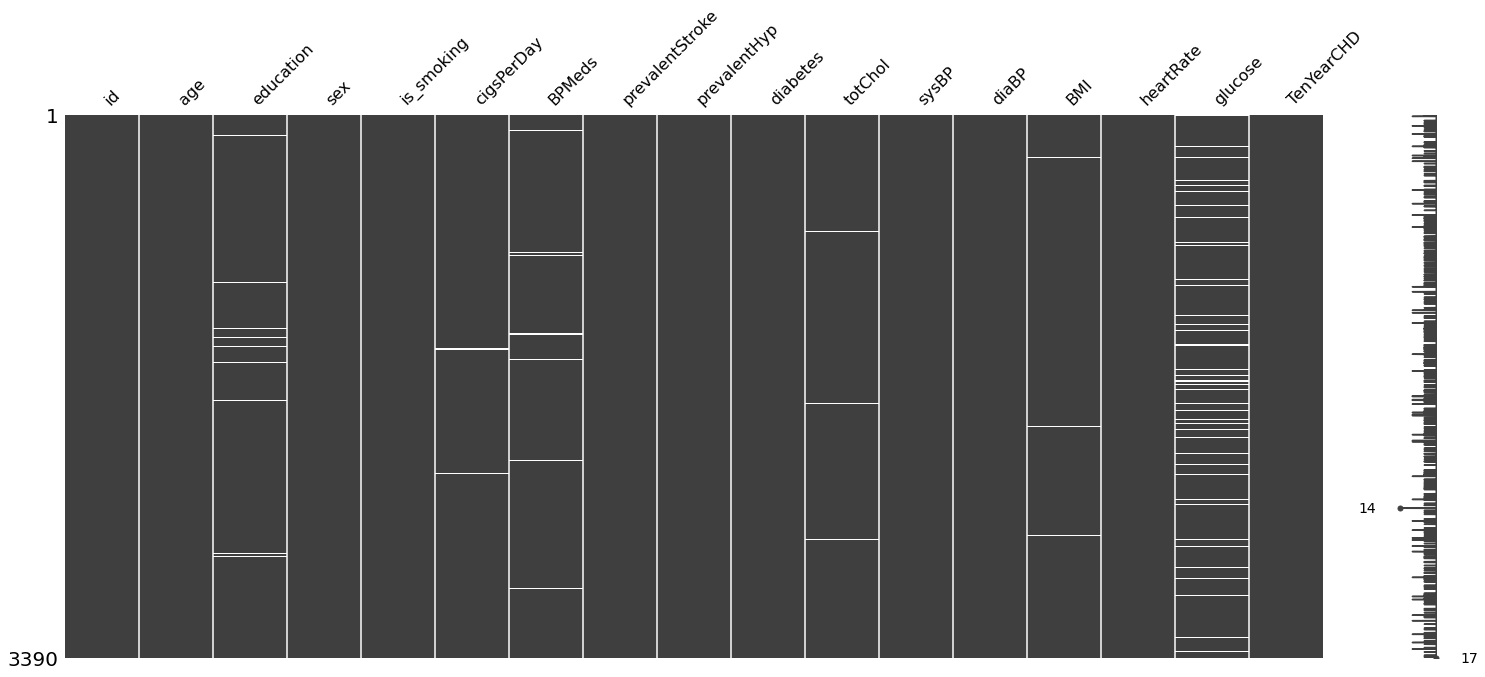

In [ ]:
# heat matrix for missing values
fig = msno.matrix(cardio_df)
fig_copy = fig.get_figure()
fig_copy.savefig('plot.png', bbox_inches = 'tight')

While horizontal lines in the bar of respective variable shows the presence of missing values. Glucose, Education, BPMeds, cigsPerday, totCol etc. columns have presence of missing values.

In [ ]:
#Calculating the percentage of NULL of values in each column
total = cardio_df.isnull().sum().sort_values(ascending=False)
percent = (cardio_df.isnull().sum()/cardio_df.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
glucose,304,8.967552
education,87,2.566372
BPMeds,44,1.297935
totChol,38,1.120944
cigsPerDay,22,0.648968
BMI,14,0.412979
heartRate,1,0.029499
TenYearCHD,0,0.000000
age,0,0.000000
sex,0,0.000000


In [ ]:
#Checking for duplicate records
len(cardio_df[cardio_df.duplicated()])

0

There are no duplicate records.

## **Handling missing values using KNN imputer**

**For numeric variable:**
Each missing value is imputed using average of n nearest neighbour values of that particular variable.

**For categorical variable:**
Missing values for categorical feature are replaced with 'Most Frequent' value for that particular variable.

In [ ]:
#Importing KNN Imputer
from sklearn.impute import KNNImputer

In [ ]:
knn_imputer = KNNImputer(n_neighbors=3, weights="uniform",metric='nan_euclidean')

In [ ]:
#Filling missing values for all numeric variables with average of 3 nearest neighbors

cardio_df['heartRate'] = knn_imputer.fit_transform(cardio_df[['heartRate']])

cardio_df['glucose'] = knn_imputer.fit_transform(cardio_df[['glucose']])

cardio_df['totChol'] = knn_imputer.fit_transform(cardio_df[['totChol']])

cardio_df['BMI'] = knn_imputer.fit_transform(cardio_df[['BMI']])

cardio_df['cigsPerDay'] = knn_imputer.fit_transform(cardio_df[['cigsPerDay']])

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
#Filling missing values in categorical variables with most frequent value fot that variable
cardio_df['education'] = imp.fit_transform(cardio_df[['education']])

cardio_df['BPMeds'] = imp.fit_transform(cardio_df[['BPMeds']])

In [ ]:
#Calculating the percentage of NULL of values in each column after handling missing values
total = cardio_df.isnull().sum().sort_values(ascending=False)
percent = (cardio_df.isnull().sum()/cardio_df.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
TenYearCHD,0,0.0
prevalentStroke,0,0.0
age,0,0.0
education,0,0.0
sex,0,0.0
is_smoking,0,0.0
cigsPerDay,0,0.0
BPMeds,0,0.0
prevalentHyp,0,0.0
glucose,0,0.0


## **Exploratory Data Analysis**

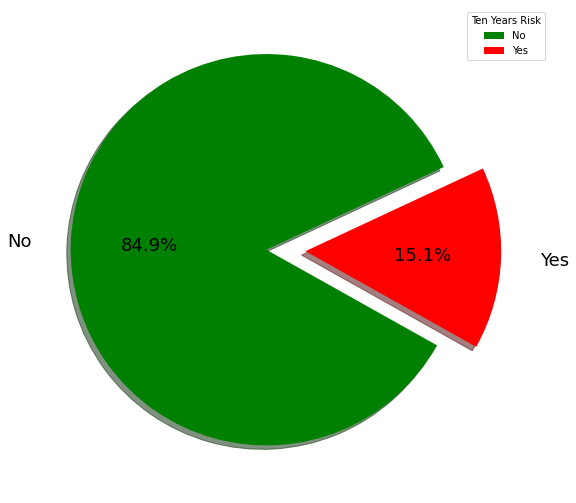

In [ ]:
#Visualizing Target Variable i.e. class proportion
my_labels = ['No','Yes']
my_explode = [0.2,0]
my_colors = ['green','red']
sizes = cardio_df['TenYearCHD'].value_counts()
fig = plt.figure(1, figsize=(9,9))
plt.pie(sizes,labels = my_labels,explode = my_explode,colors = my_colors,labeldistance = 1.2,autopct='%1.1f%%',startangle = 25,shadow = True,pctdistance = 0.6,textprops={'fontsize': 18} )
plt.legend(title = 'Ten Years Risk')
fig.savefig('Ten Years Risk.png')
plt.show()

84.9% records belong to class 'No' and only 15.1% records belong to class 'Yes'. This shows that the class poportion is imbalanced and this needs to be taken care splitting the dataset into train-test and training the models.